In [1]:
from farrt.plot import plot_world, plot_polygons, plot_polygon
from farrt.world import World

In [2]:
from abc import ABC, abstractmethod
from typing import List, TypeVar
import random
from shapely.geometry import Point, MultiPolygon, Polygon, CAP_STYLE, JOIN_STYLE
from shapely.geometry.base import BaseGeometry

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

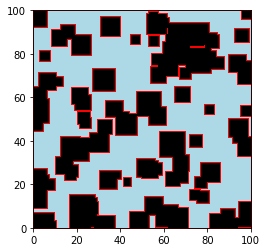

In [3]:
w = World()
plot_world(w)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

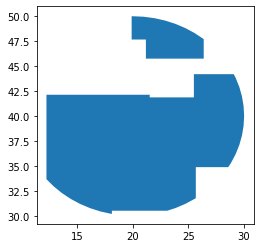

In [4]:
obs = w.make_observations(position=Point(20,40), radius=10)
plot_polygons(obs, dims=w.dims)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

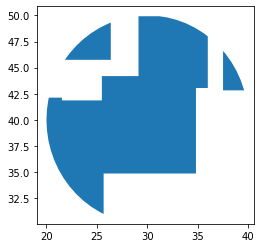

In [5]:
obs2 = w.make_observations(position=Point(30,40), radius=10)
plot_polygons(obs2, dims=w.dims)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

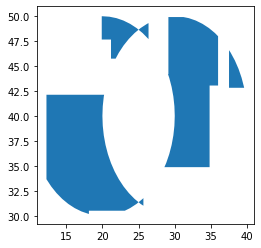

In [6]:
diff = obs ^ obs2
plot_polygons(diff, dims=w.dims)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

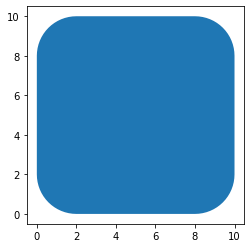

In [7]:
from shapely.geometry import CAP_STYLE
plot_polygons([Point(5,5).buffer(3,cap_style=CAP_STYLE.square).buffer(2)], dims=[10,10])
# new_obstacles = Polygon()
# for node in nodes:
#   node.neighbors = []
#   if node.coord.buffer(dball_size).intersects(new_obstacles):
#     pq.add(node)

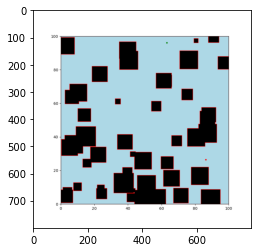

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("./rrtstar-gifs/run-4.gif")
plt.imshow(img)

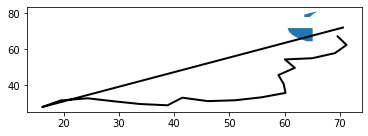

In [9]:
from shapely.wkt import loads
path = loads("LINESTRING (70.56377227242272 72.01661120696966, 16.118509139343463 27.94387972227166, 19.51059669576186 31.61726263310351, 24.372728207564208 32.78331458818038, 29.088122173406244 31.12046770800755, 33.85659568969396 29.61658595585326, 38.804850019228496 28.89910488276303, 41.48438975872583 33.1204869768709, 46.10685840576791 31.214500721119567, 51.08302675828655 31.702095355413178, 55.812413257364156 33.324717721320425, 60.17257590987764 35.771957318014344, 59.84203915333907 40.76101990056199, 58.88023679376778 45.667641571439326, 61.8674421743615 49.677205639284104, 60.05305160829509 54.33638870863963, 65.00882653091423 54.99993593102789, 69.12988763921904 57.8313411195549, 71.22064557308624 62.37322743054633, 69.6132145112205 67.10779872912757)")
obstacles = loads("MULTIPOLYGON (((63.55380933519733 79.14306124897844, 64.21983943078627 79.74671574059703, 65.0080699422267 80.33130732999511, 65.84980490416275 80.83582385045321, 65.96937066687049 80.89237424461655, 65.47221958853405 80.06292778046505, 65.05263690690472 79.17579473585597, 64.72202887469551 78.2518071847497, 64.63075557254251 77.88742373707125, 63.55380933519733 77.88742373707125, 63.55380933519733 79.14306124897844)), ((65.0933720681093 64.38215423601012, 64.114308607789 64.38215423601012, 63.49270446055725 64.94554339510418, 62.833667738795356 65.6726783653332, 62.24907614939727 66.46090887677363, 61.74455962893917 67.30264383870968, 61.32497694730986 68.18977688331876, 60.99436891510064 69.11376443442504, 60.75591946839042 70.06570798680838, 60.611925005700755 71.03643980367404, 60.578374133207085 71.71938350250907, 64.98205707561995 71.71938350250907, 65.05263690690472 71.52212608855417, 65.0933720681093 71.43599882648098, 65.0933720681093 64.38215423601012)))")
intersection = path.intersection(obstacles)
fig,ax = plot_polygons(obstacles)
x, y = map(list, path.xy)
ax.plot(x, y, color='black', linewidth=2)
plt.show()

In [10]:
from shapely.geometry import MultiPoint
pt0 = Point(0,0)
pt1 = Point(1,1)
pt2 = Point(2,2)
x = dict()
x[pt0.coords[0]] = 0
x[pt1.coords[0]] = 1
x[pt2.coords[0]] = 2
print(x)
mp = MultiPoint([pt0,pt1,pt2])
intx = mp.intersection(Point(1,1).buffer(5))
if intx.is_empty:
  print("empty")
elif isinstance(intx, Point):
  print("point")
  x[intx.coords[0]] += 10
elif isinstance(intx, MultiPoint):
  print("multipoint")
  for p in intx.geoms:
    x[p.coords[0]] += 10
print(intx)
print(x)

{(0.0, 0.0): 0, (1.0, 1.0): 1, (2.0, 2.0): 2}
multipoint
MULTIPOINT (0 0, 1 1, 2 2)
{(0.0, 0.0): 10, (1.0, 1.0): 11, (2.0, 2.0): 12}


In [11]:
geoms = MultiPoint([mp - pt1 - pt2]).geoms
list(map(str,geoms))

['POINT (0 0)']

In [12]:
from shapely.ops import nearest_points
print(nearest_points(Point(0.5,0.6), mp)[1])

POINT (1 1)


MULTILINESTRING ((0 0, 0 1), (0 0, 1 1), (0 0, 1 0), (0 1, 1 1), (0 1, 1 0), (1 1, 1 0))
(0.0, 0.0, 1.0, 1.0)


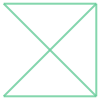

In [13]:
from shapely.geometry import MultiLineString, LineString
p0 = Point(0,0)
p1 = Point(0,1)
p2 = Point(1,1)
p3 = Point(1,0)
l01 = LineString([p0,p1])
l02 = LineString([p0,p2])
l03 = LineString([p0,p3])
l12 = LineString([p1,p2])
l13 = LineString([p1,p3])
l23 = LineString([p2,p3])
mls = MultiLineString([l01,l02,l03,l12,l13,l23])
print(mls)
sub = mls - l01
print(sub.bounds)
sub

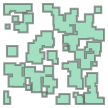

In [14]:
w = World()
w.obstacles

In [15]:
def ranomMultiPoint(n):
  pts = []
  for i in range(n):
    pts.append(Point(random.random()*w.dims[0], random.random()*w.dims[1]))
  return MultiPoint(pts)
rmp = ranomMultiPoint(20)

In [16]:
nearest_points(w.obstacles, rmp)

(<shapely.geometry.point.Point at 0x7f6091f80250>,
 <shapely.geometry.point.Point at 0x7f6091f81ff0>)

In [17]:
print(w.obstacles.centroid)

POINT (52.445719581499624 49.63738651240834)


In [18]:
print(rmp)
# print(rmp.buffer(8))

MULTIPOINT (89.43674865694565 1.4279458863060923, 62.517464365745724 47.111573946344485, 67.21445227732954 95.17599994136, 13.925841195171241 38.310196083371004, 40.13758456470041 73.55980467012905, 85.51463502178251 3.331689065104426, 93.34717047518788 11.690754858049946, 81.04472902978797 63.80877680556609, 71.08560124149766 16.756362671856905, 23.373411156478763 69.3865935411186, 32.63860212498004 81.55311978006853, 27.00496273671448 47.82751603467103, 24.627599003990653 76.17806634799881, 73.8242069901797 37.91657663533135, 22.882677752483016 76.94161843361435, 65.61338468922091 98.38534737340207, 1.7466571870836667 84.66428935581905, 44.393312027240384 11.233546699098563, 45.578305857909115 63.376195932992104, 91.92140597118613 42.702091415394484)


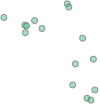

In [19]:
rmp - Point(40,40).buffer(30)

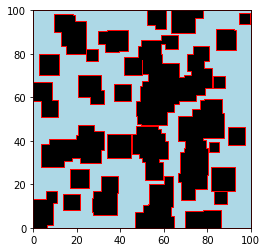

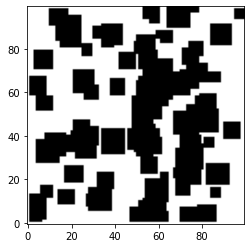

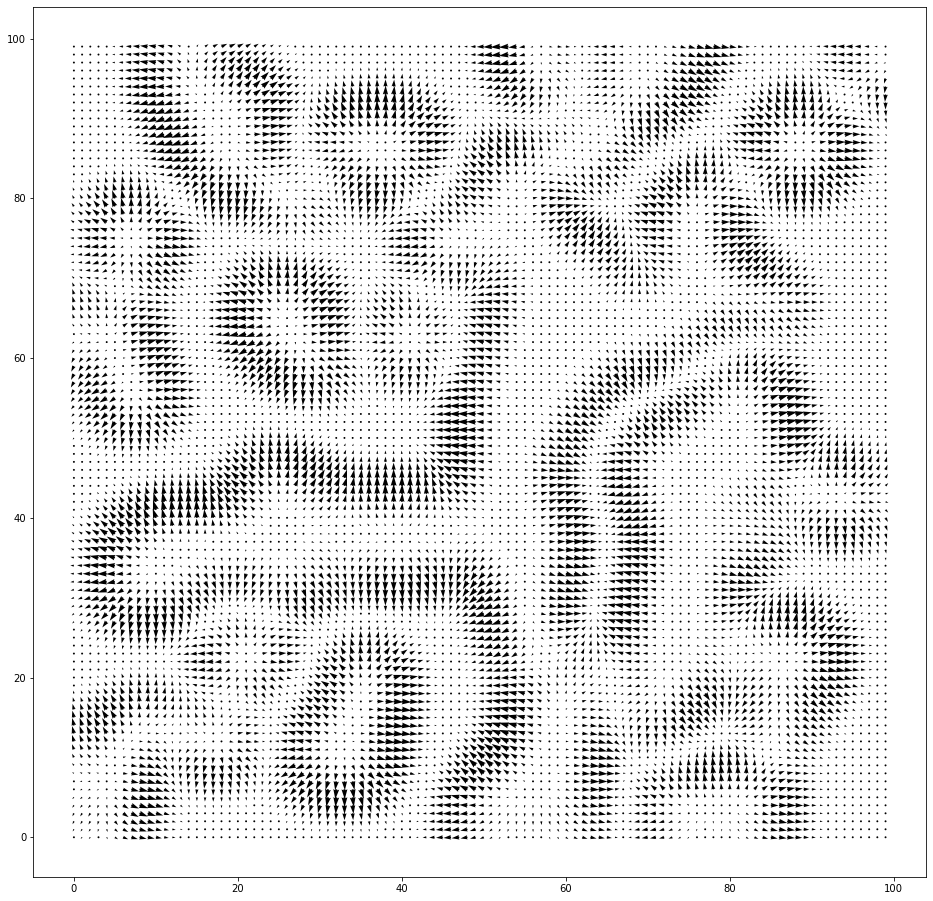

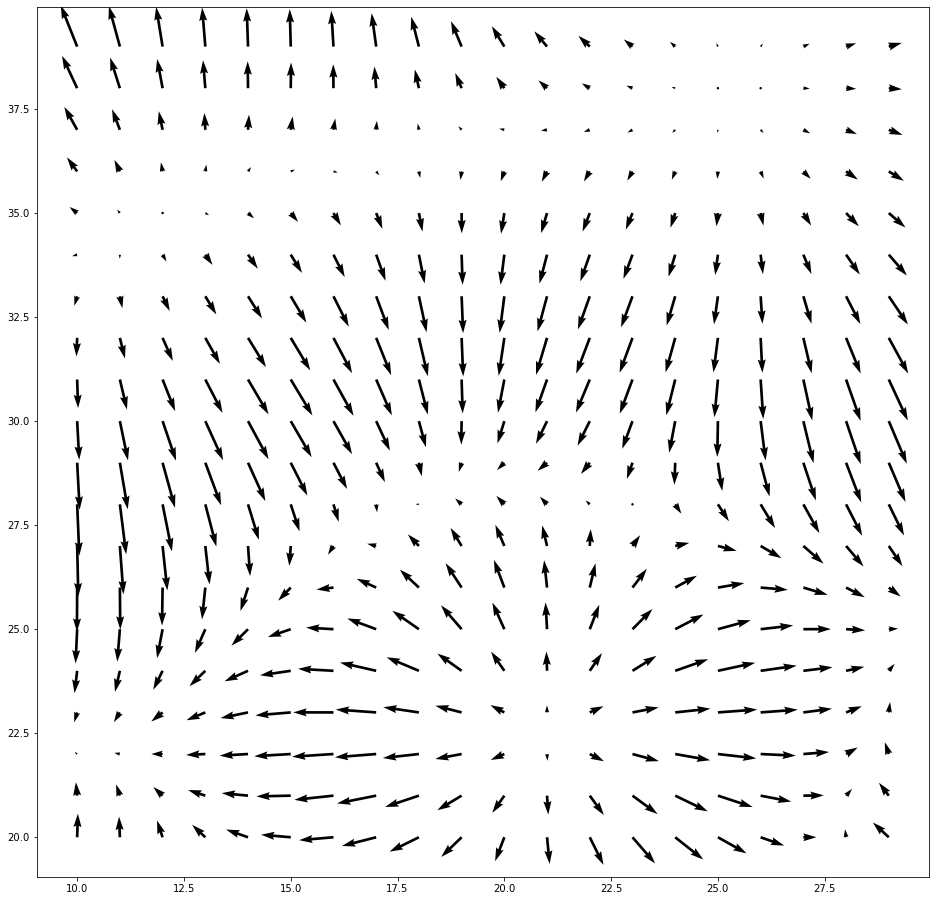

In [13]:
import numpy as np
import math
from scipy.ndimage import gaussian_filter
from farrt.plot import plot_potential_field, plot_world
from farrt.world import World
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt

w = World()
fig,ax=plot_world(w)
plt.show()

blurred_mask = np.ones(tuple(w.dims))

# get a mask of all coordinates contained within the new obstacles
obstacle: Polygon
for obstacle in w.obstacles.geoms:
  minx, miny, maxx, maxy = obstacle.bounds
  for x in range(math.floor(minx), math.ceil(maxx)+1):
    for y in range(math.floor(miny), math.ceil(maxy)+1):
      if obstacle.contains(Point(x, y)):
        blurred_mask[y,x] = 0

plt.imshow(np.tile(blurred_mask[:,:,None], (1, 1, 3)))
plt.gca().invert_yaxis()
# blur the mask
blurred_mask = np.array(gaussian_filter(blurred_mask*5, sigma=3), dtype=float)

# take the gradient of the blurred mask
dy,dx = np.gradient(blurred_mask)

field = np.zeros((*w.dims, len(w.dims)))
field[:,:,0] = dx
field[:,:,1] = dy

plot_potential_field(field,figsize=(16,16))
plot_potential_field(field,figsize=(16,16),center=(20,30),lim=10)

In [18]:
coord = (25,20)[::-1]
dx[coord],dy[coord]

(0.34267811961400607, -0.19271829082042968)

In [24]:
list(LineString([(25,20),(25,30)]).coords)

[(25.0, 20.0), (25.0, 30.0)]

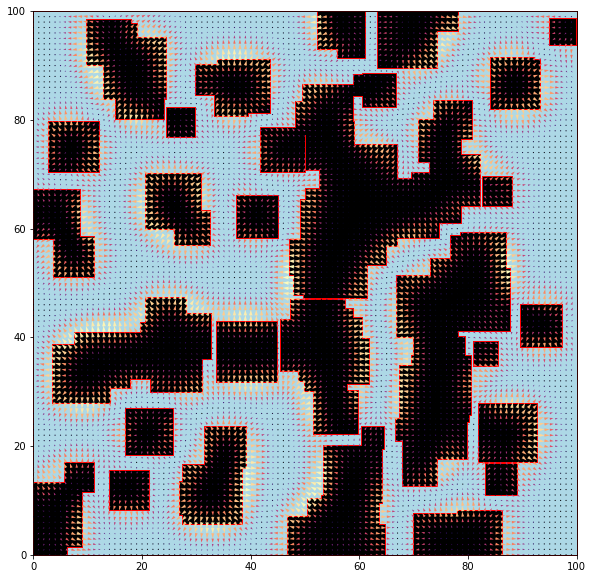

In [33]:
fig,ax = plot_world(w)
plot_potential_field(field,fig_ax=(fig,ax))
plt.show()